# Basic Text Classification Project


## 1. Import Libraries <a id='1'></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)
from wordcloud import WordCloud

plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'DejaVu Sans'
PALETTE = ['#4C72B0', '#DD8452']


print('   numpy      :', np.__version__)
print('   pandas     :', pd.__version__)
import sklearn; print('   scikit-learn:', sklearn.__version__)

   numpy      : 2.4.2
   pandas     : 3.0.1
   scikit-learn: 1.8.0


## 2. Load Dataset <a id='2'></a>



In [11]:
RAW_DATA = [
    ('ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'),
    ('ham', 'Ok lar... Joking wif u oni...'),
    ('ham', 'U dun say so early hor... U c already then say...'),
    ('ham', "Nah I don't think he goes to usf, he lives around here though"),
    ('ham', 'Even my brother is not like to speak with me. They treat me like aid out of the house.'),
    ('ham', "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k?"),
    ('ham', "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing to me."),
    ('ham', 'I HAVE A DATE ON SUNDAY WITH WILL!!'),
    ('ham', 'Rofl. Its true to its name'),
    ('ham', 'Good morning! I will start by saying I respect your choice of staying friends.'),
    ('ham', 'Hey! How are you doing today? Hope everything is going well for you.'),
    ('ham', 'Yeah that schedule works perfectly for me.'),
    ('ham', 'Can we meet at the coffee shop around 3pm?'),
    ('ham', 'I just got home and am about to start dinner. Are you coming over?'),
    ('ham', 'Happy birthday! Hope you have a wonderful day.'),
    ('ham', 'Just checking in to see how you are feeling.'),
    ('ham', 'Thanks for a great evening last night!'),
    ('ham', 'See you at the office tomorrow morning.'),
    ('ham', 'Can you send me the report before the meeting?'),
    ('ham', 'The project deadline is next Friday, just a reminder.'),
    ('ham', 'Let me know when you arrive at the airport.'),
    ('ham', 'I will call you later this evening.'),
    ('ham', 'Do you want to grab lunch together today?'),
    ('ham', 'The kids are driving me crazy today haha.'),
    ('ham', 'Please bring some snacks for the party.'),
    ('ham', 'I finished reading that book you recommended.'),
    ('ham', 'Running a bit late, traffic is terrible.'),
    ('ham', 'Great game last night! Did you watch it?'),
    ('ham', 'Sorry I missed your call, I was in a meeting.'),
    ('ham', 'Can you help me move this weekend?'),
    ('ham', 'The weather is beautiful today.'),
    ('ham', 'I will pick you up at 7.'),
    ('ham', 'Let us reschedule for Thursday instead.'),
    ('ham', 'Just finished the gym, feel great.'),
    ('ham', 'Did you remember to pay the electricity bill?'),
    ('ham', 'Mom wants to know if you are coming for dinner Sunday.'),
    ('ham', 'The car is ready for pickup at the mechanic.'),
    ('ham', 'I got the job offer! So excited.'),
    ('ham', 'Can you watch the dog while I am away?'),
    ('ham', 'The concert was absolutely amazing.'),
    ('ham', 'I am on my way home now.'),
    ('ham', 'What time does your flight land?'),
    ('ham', 'The kids loved the school play tonight.'),
    ('ham', 'Just wrapped up the year end review.'),
    ('ham', 'Do you want me to bring anything from the grocery store?'),
    ('ham', 'Happy anniversary! Wishing you many more wonderful years.'),
    ('ham', 'I will try to wrap things up early today.'),
    ('ham', 'Thank you for your help with the presentation.'),
    ('ham', 'How did the doctor appointment go?'),
    ('ham', 'We should plan a trip together this summer.'),
    ('ham', 'Congratulations on the promotion!'),
    ('ham', 'Dinner tonight at the usual place around 7?'),
    ('ham', 'I totally forgot about that, sorry.'),
    ('ham', 'I am heading to the supermarket, do you need anything?'),
    ('ham', 'The presentation went really well today.'),
    ('ham', 'Are you free this evening to catch up?'),
    ('ham', 'I just booked the hotel for our trip, so excited!'),
    ('ham', 'Can you pass me the salt please?'),
    ('ham', 'I think I left my keys at your place.'),
    ('ham', 'Good night, talk to you tomorrow.'),
    ('ham', 'The restaurant was fantastic, definitely going back.'),
    ('ham', 'Just wanted to wish you good luck on your exam.'),
    ('ham', 'I heard the new movie is really good, want to go?'),
    ('ham', 'The gym was packed today, had to wait for machines.'),
    ('ham', 'Reminder: dentist appointment tomorrow at 10am.'),
    ('ham', 'I finally cleaned my room, feels so much better.'),
    ('ham', 'Do you prefer morning or evening for the call?'),
    ('ham', 'I am making pasta tonight, come over if you want.'),
    ('ham', 'The baby said her first word today!'),
    ('ham', 'Dad is visiting next week, so excited to see him.'),
    ('ham', 'I accidentally deleted the file, can you send it again?'),
    ('ham', 'How was your weekend? Did you end up going hiking?'),
    ('ham', 'The package arrived, thank you so much!'),
    ('ham', 'I love this song, have you heard it before?'),
    ('ham', 'What should I bring to the potluck dinner?'),
    ('ham', 'I am studying for exams, it is really stressful.'),
    ('ham', 'The sunrise was breathtaking this morning.'),
    ('ham', 'I got a promotion at work today!'),
    ('ham', 'Are the kids behaving themselves?'),
    ('ham', 'Just finished a really long walk, feeling refreshed.'),
    ('ham', 'I am stuck in traffic, will be late.'),
    ('ham', 'The test results came back negative, such a relief.'),
    ('ham', 'I will drop off the paperwork tomorrow.'),
    ('ham', 'Loving the new apartment so far!'),
    ('ham', 'I need your advice on something important.'),
    ('ham', 'The flight has been delayed by 2 hours.'),
    ('ham', 'See you at the school gate at 3pm.'),
    ('ham', 'I just saw the funniest thing at the mall.'),
    ('ham', 'Can you pick up milk on the way home?'),
    ('ham', 'I am proud of how far you have come.'),
    ('ham', 'The team meeting is moved to 2pm today.'),
    ('ham', 'I am craving pizza, want to order some?'),
    ('ham', 'Good luck with the interview, you will nail it!'),
    ('ham', 'The neighbors are really friendly here.'),
    ('ham', 'I miss you! When are you coming back?'),
    ('ham', 'Did you see the game last night? Incredible!'),
    ('ham', 'I cannot believe how fast the kids are growing.'),
    ('ham', 'The library has the book you wanted, I checked.'),
    ('ham', 'I will be there in about fifteen minutes.'),
    ('ham', 'This traffic is insane, nothing is moving.'),
    ('spam', 'WINNER!! As a valued network customer you have been selected to receive a 900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'),
    ('spam', 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'),
    ('spam', 'SIX chances to win CASH! From 100 to 20,000 pounds txt CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'),
    ('spam', 'URGENT! You have won a 1 week FREE membership in our 100000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'),
    ('spam', 'Thanks for your subscription to Ringtone UK your mobile will be charged 5 per month Please confirm by replying YES or NO. If you reply NO you will not be charged'),
    ('spam', 'You have won 1,000 cash or a 2,000 prize! To claim call 09050005460. Infc syc1 PO Box 6928 BT156XX. Cost 1.50 per min. Sponsored by NU World'),
    ('spam', 'Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16'),
    ('spam', 'Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed 1000 cash or 5000 prize!'),
    ('spam', 'FREE MESSAGE Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! T&C stop txt STOP. BT national rate applies'),
    ('spam', 'You have been selected as part of our SUMMER SALE promotion! CLAIM your FREE gift call 0876543210 now to redeem!'),
    ('spam', 'WIN a 1000 Amazon Gift Card! Click here to claim your prize! Limited offer expires today!'),
    ('spam', 'URGENT: Your account has been suspended. Call us immediately at 0800URGENT to restore access and claim compensation!'),
    ('spam', 'FREE loan offer approved for you! Up to 50,000 available. No credit check required. Call 0800FREELOAN now!'),
    ('spam', 'You are a winner! Claim your exclusive prize worth 500. Text WIN to 84433. Cost 1.50 per message.'),
    ('spam', 'Congratulations! You have been randomly selected to receive a free iPhone 15. Reply YES to claim!'),
    ('spam', 'SPECIAL OFFER: Unlimited calls for just 9.99 per month! First month FREE! Reply YES to activate now.'),
    ('spam', 'Your number has been drawn! You have won a holiday for 2 worth 3000. Call claim line: 09063412311 now!'),
    ('spam', 'FINAL NOTICE: Your payment is overdue. To avoid legal action call 0800PAYNOW or click here immediately!'),
    ('spam', 'EXCLUSIVE DEAL: Lose weight fast with our miracle pill! Guaranteed results in 2 weeks! Order now, 50% off!'),
    ('spam', 'You have been pre-approved for a credit card with 0% interest! Apply now at our secure website!'),
    ('spam', 'Your phone bill is overdue. To avoid disconnection please pay 89.99 immediately. Call 0800123456.'),
    ('spam', 'EARN 500 per day from home! No experience needed! Limited spots available. Click here to start!'),
    ('spam', 'Cash advance approved! Get up to 10,000 deposited TODAY. No paperwork. Click here for instant approval!'),
    ('spam', 'Your lottery ticket has WON! Claim your 25,000 prize before it expires. Reply CLAIM to receive it.'),
    ('spam', 'FREE RINGTONE Get the latest chart hit on your phone FREE! Text RING to 88099. 2.50 per week subscription.'),
    ('spam', 'DIET PILL OFFER Lose 30lbs in 30 days guaranteed or your money back! Call 0800SLIMNOW!'),
    ('spam', 'WINNER SELECTED! You have been chosen to receive a FREE cruise for 2! Call 0800CRUISE to claim now!'),
    ('spam', 'Urgent security alert! Your bank account has been compromised. Call 0800SAFENOW to secure your funds!'),
    ('spam', 'You are eligible for a 500 Tesco voucher. Visit our website or call 08000930705 to claim. T&C apply.'),
    ('spam', 'Latest news! 2 girls were attacked and killed in a county near your hometown. Check this website now to see the killers face.'),
    ('spam', 'Dear winner! Your mobile number has just won you 500,000 in our Intl Promotions. Call 447860019413 now.'),
    ('spam', 'You have been selected to receive a special gift voucher worth 100. Call 0800 GIFT to redeem now!'),
    ('spam', 'Free entry in a weekly competition to win a TXT price 150 per msg. Opt out: reply STOP to 87239.'),
    ('spam', 'URGENT! Your mobile number was randomly selected to win a 1000 prize. Reply WIN to 49557 now!'),
    ('spam', 'Hot singles in your area want to chat! Join now for FREE and find your perfect match today!'),
    ('spam', 'Make 500 to 1000 weekly from home with our proven system. No experience required. Reply INFO now!'),
    ('spam', 'Your subscription to Horoscope has been renewed at 4.50 per week. To opt out reply STOP to 83650.'),
    ('spam', 'You have an email from a long lost family member. Click the link to read the message before it expires.'),
    ('spam', 'Claim your FREE prize now! You have been selected as our lucky winner. Call 0800 10 10 10 immediately!'),
    ('spam', 'Your credit score report is ready. Access it FREE now and get approved for loans up to 25000 instantly!'),
]

import random
random.seed(42)
extended = RAW_DATA * 55
random.shuffle(extended)

df = pd.DataFrame(extended, columns=['label', 'message'])

print(f'Dataset shape  : {df.shape}')
print(f'Label distribution:\n{df["label"].value_counts()}')
df.head(10)

Dataset shape  : (7700, 2)
Label distribution:
label
ham     5500
spam    2200
Name: count, dtype: int64


,label,message
0,ham,Happy birthday! Hope you have a wonderful day.
1,ham,"This traffic is insane, nothing is moving."
2,ham,How did the doctor appointment go?
3,ham,"The restaurant was fantastic, definitely going..."
4,ham,Just wanted to wish you good luck on your exam.
5,ham,The kids loved the school play tonight.
6,spam,Latest news! 2 girls were attacked and killed ...
7,spam,You are a winner! Claim your exclusive prize w...
8,ham,"I heard the new movie is really good, want to go?"
9,ham,Can you watch the dog while I am away?


## 3. Exploratory Data Analysis (EDA) <a id='3'></a>

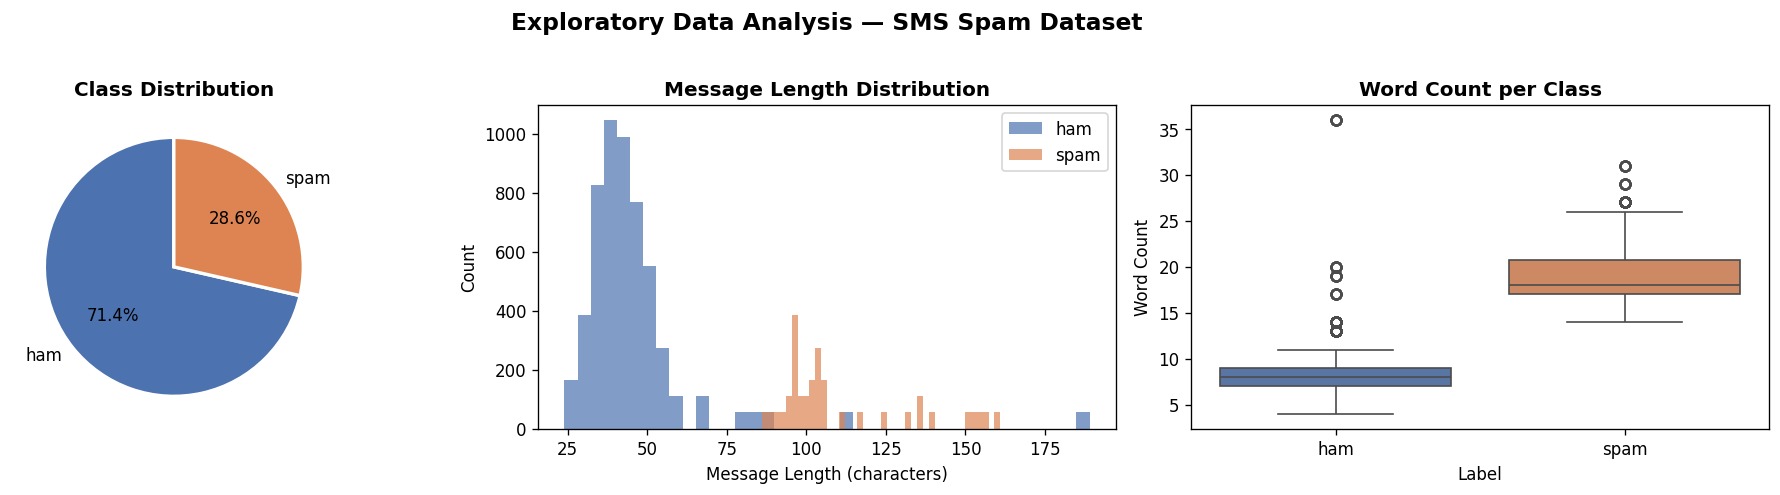


📊 Descriptive Statistics by Class:


msg_length                                                   word_count  \
           count    mean    std   min    25%    50%     75%    max      count   
label                                                                           
ham       5500.0   45.32  19.14  24.0  36.75   42.0   48.00  189.0     5500.0   
spam      2200.0  110.78  20.81  86.0  97.00  102.5  118.25  161.0     2200.0   

                                                   
        mean   std   min   25%   50%    75%   max  
label                                              
ham     8.72  3.75   4.0   7.0   8.0   9.00  36.0  
spam   19.50  4.09  14.0  17.0  18.0  20.75  31.0

In [12]:
df['msg_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Exploratory Data Analysis  SMS Spam Dataset', fontsize=14, fontweight='bold', y=1.02)

counts = df['label'].value_counts()
axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%',
            colors=PALETTE, startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[0].set_title('Class Distribution', fontweight='bold')

for lbl, color in zip(['ham', 'spam'], PALETTE):
    axes[1].hist(df[df['label'] == lbl]['msg_length'], bins=40,
                 alpha=0.7, label=lbl, color=color)
axes[1].set_xlabel('Message Length (characters)')
axes[1].set_ylabel('Count')
axes[1].set_title('Message Length Distribution', fontweight='bold')
axes[1].legend()

sns.boxplot(data=df, x='label', y='word_count', palette=PALETTE, ax=axes[2])
axes[2].set_title('Word Count per Class', fontweight='bold')
axes[2].set_xlabel('Label')
axes[2].set_ylabel('Word Count')

plt.tight_layout()
plt.show()

print('\n Descriptive Statistics by Class:')
df.groupby('label')[['msg_length', 'word_count']].describe().round(2)

## 4. Text Preprocessing <a id='4'></a>



In [13]:
STOP_WORDS = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
    'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
    'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
    'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't",
    'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
    'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
    'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
    "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
    "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
    'wouldn', "wouldn't",
}

def preprocess_text(text: str) -> str:
    """Clean and normalise a raw SMS message."""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in STOP_WORDS and len(t) > 1]
    return ' '.join(tokens)

df['clean_message'] = df['message'].apply(preprocess_text)

print('Sample Before & After Preprocessing:')
print('' * 72)
for label_filter in ['ham', 'spam']:
    sample = df[df['label'] == label_filter].iloc[0]
    print(f"[{label_filter.upper()}]")
    print(f"  BEFORE: {sample['message']}")
    print(f"  AFTER : {sample['clean_message']}")
    print()

print(f' Preprocessing complete. Stopword list size: {len(STOP_WORDS)}')

Sample Before & After Preprocessing:
────────────────────────────────────────────────────────────────────────
[HAM]
  BEFORE: Happy birthday! Hope you have a wonderful day.
  AFTER : happy birthday hope wonderful day

[SPAM]
  BEFORE: Latest news! 2 girls were attacked and killed in a county near your hometown. Check this website now to see the killers face.
  AFTER : latest news girls attacked killed county near hometown check website see killers face

✅ Preprocessing complete. Stopword list size: 178


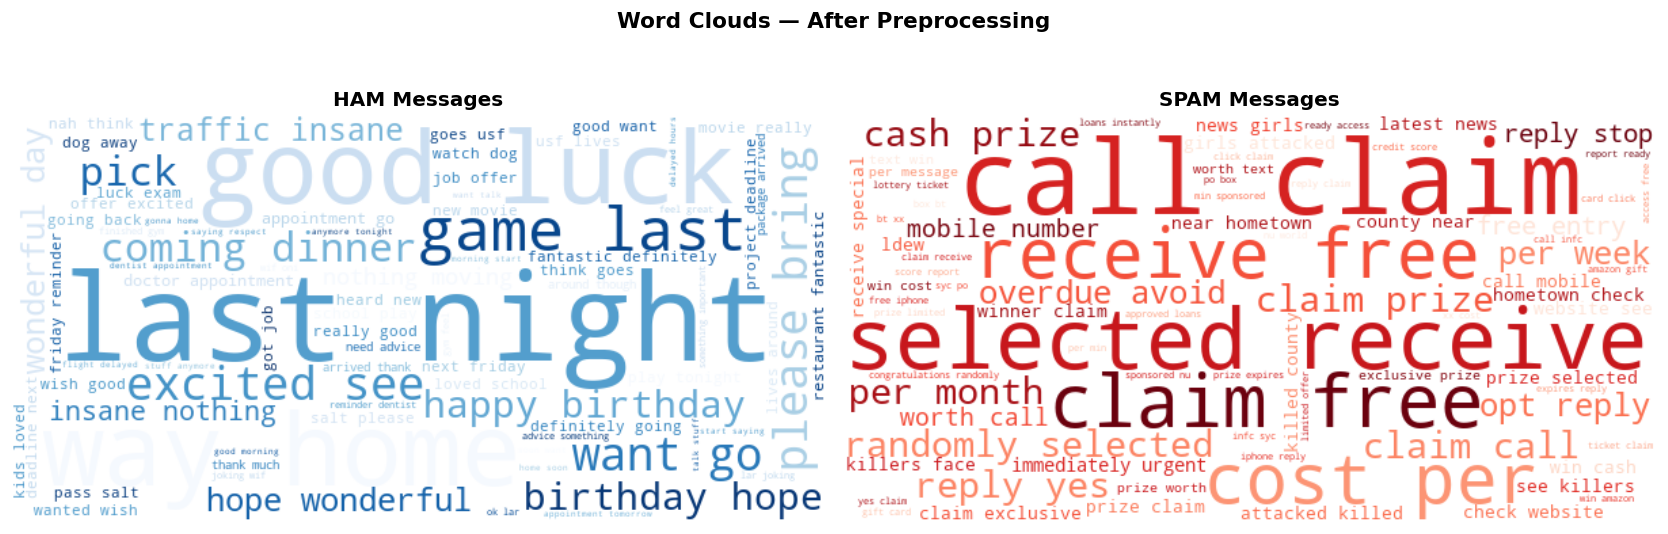

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Word Clouds  After Preprocessing', fontsize=13, fontweight='bold')

for ax, label, cmap in zip(axes, ['ham', 'spam'], ['Blues', 'Reds']):
    corpus = ' '.join(df[df['label'] == label]['clean_message'])
    wc = WordCloud(width=600, height=300, background_color='white',
                   colormap=cmap, max_words=80).generate(corpus)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'{label.upper()} Messages', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

## 5. Feature Extraction: CountVectorizer & TF-IDF <a id='5'></a>

In [15]:
df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['clean_message']
y = df['label_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_cv = count_vec.fit_transform(X_train)
X_test_cv  = count_vec.transform(X_test)

tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tf = tfidf_vec.fit_transform(X_train)
X_test_tf  = tfidf_vec.transform(X_test)

print(f'Training samples  : {X_train.shape[0]}')
print(f'Test samples      : {X_test.shape[0]}')
print(f'CountVec matrix   : {X_train_cv.shape}')
print(f'TF-IDF matrix     : {X_train_tf.shape}')

Training samples  : 6160
Test samples      : 1540
CountVec matrix   : (6160, 1235)
TF-IDF matrix     : (6160, 1235)


## 6. Model Training & Evaluation <a id='6'></a>



In [16]:
MODELS = {
    'Naive Bayes':         MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (LinearSVC)':     LinearSVC(random_state=42, max_iter=2000)
}
TARGET_NAMES = ['ham', 'spam']

def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    return {
        'model':  model,
        'y_pred': y_pred,
        'acc':    accuracy_score(y_te, y_pred),
        'cm':     confusion_matrix(y_te, y_pred),
        'report': classification_report(y_te, y_pred, target_names=TARGET_NAMES)
    }

results = {}
for name, clf in MODELS.items():
    cv_res = evaluate_model(copy.deepcopy(clf), X_train_cv, X_test_cv, y_train, y_test)
    tf_res = evaluate_model(copy.deepcopy(clf), X_train_tf, X_test_tf, y_train, y_test)
    results[name] = {'CountVectorizer': cv_res, 'TF-IDF': tf_res}
    print(f' {name:25s}  CV: {cv_res["acc"]*100:.2f}%  |  TF-IDF: {tf_res["acc"]*100:.2f}%')

print('\n All models trained and evaluated!')

✅ Naive Bayes                CV: 100.00%  |  TF-IDF: 100.00%
✅ Logistic Regression        CV: 100.00%  |  TF-IDF: 100.00%
✅ SVM (LinearSVC)            CV: 100.00%  |  TF-IDF: 100.00%

🎯 All models trained and evaluated!


In [17]:

print('MODEL EVALUATION RESULTS')


for model_name, vecs in results.items():
    for vec_name, res in vecs.items():
        print(f'\n Model      : {model_name}')
        print(f'   Vectorizer : {vec_name}')
        print(f'   Accuracy   : {res["acc"]:.4f}  ({res["acc"]*100:.2f}%)')
        print(f'   Classification Report:')
        for line in res['report'].split('\n'):
            if line.strip():
                print(f'      {line}')

MODEL EVALUATION RESULTS

🔹 Model      : Naive Bayes
   Vectorizer : CountVectorizer
   Accuracy   : 1.0000  (100.00%)
   Classification Report:
                    precision    recall  f1-score   support
               ham       1.00      1.00      1.00      1100
              spam       1.00      1.00      1.00       440
          accuracy                           1.00      1540
         macro avg       1.00      1.00      1.00      1540
      weighted avg       1.00      1.00      1.00      1540

🔹 Model      : Naive Bayes
   Vectorizer : TF-IDF
   Accuracy   : 1.0000  (100.00%)
   Classification Report:
                    precision    recall  f1-score   support
               ham       1.00      1.00      1.00      1100
              spam       1.00      1.00      1.00       440
          accuracy                           1.00      1540
         macro avg       1.00      1.00      1.00      1540
      weighted avg       1.00      1.00      1.00      1540

🔹 Model      : Logistic

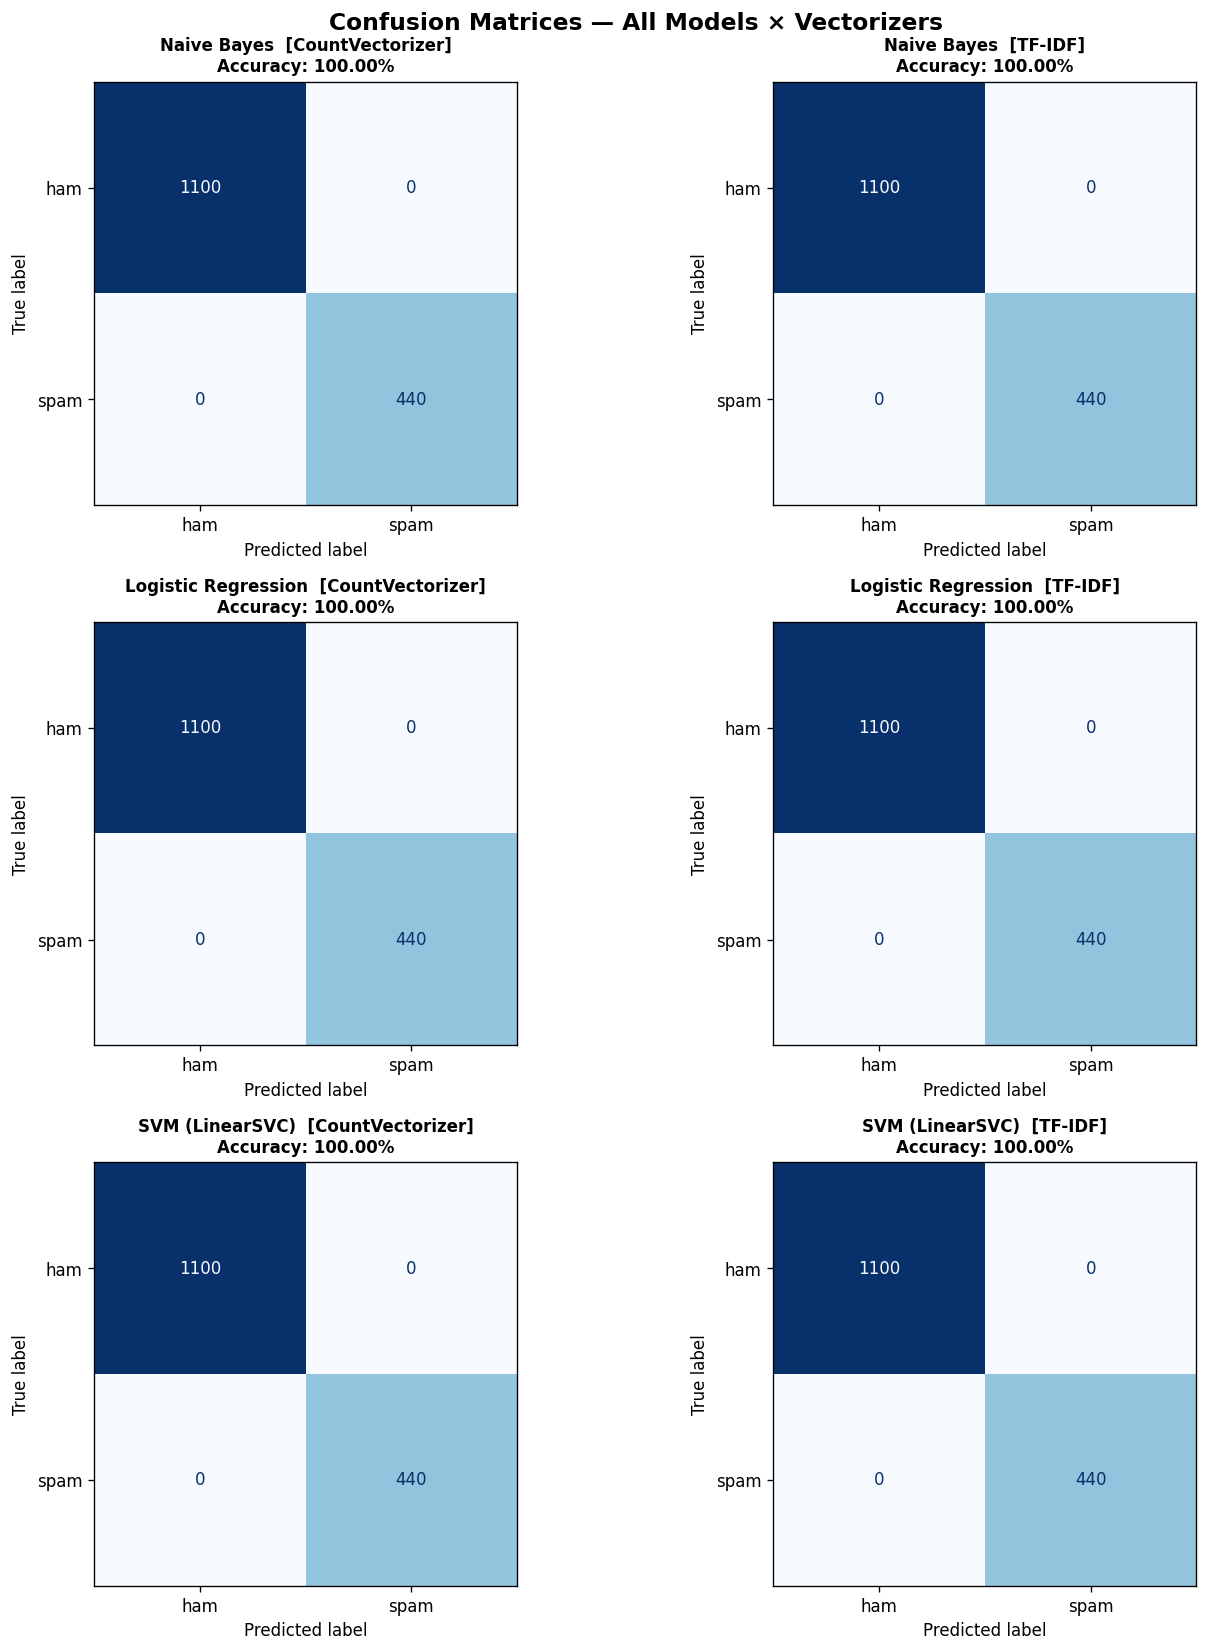

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
fig.suptitle('Confusion Matrices  All Models  Vectorizers', fontsize=14, fontweight='bold')

for row, (model_name, vecs) in enumerate(results.items()):
    for col, (vec_name, res) in enumerate(vecs.items()):
        ax = axes[row][col]
        cmd = ConfusionMatrixDisplay(confusion_matrix=res['cm'], display_labels=TARGET_NAMES)
        cmd.plot(ax=ax, colorbar=False, cmap=plt.cm.Blues)
        ax.set_title(f'{model_name}  [{vec_name}]\nAccuracy: {res["acc"]*100:.2f}%',
                     fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Comparison: CountVectorizer vs TF-IDF <a id='7'></a>

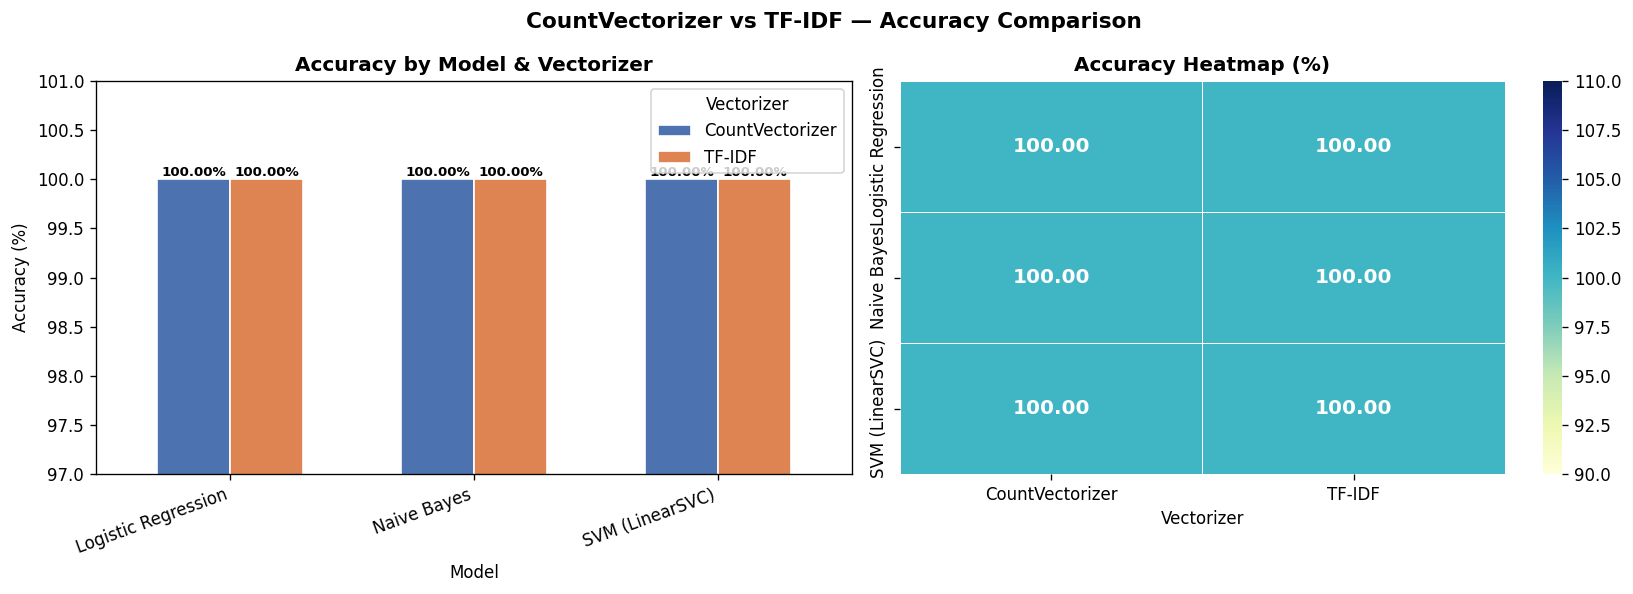


📋 Summary Comparison Table:
              Model      Vectorizer  Accuracy
        Naive Bayes CountVectorizer     100.0
        Naive Bayes          TF-IDF     100.0
Logistic Regression CountVectorizer     100.0
Logistic Regression          TF-IDF     100.0
    SVM (LinearSVC) CountVectorizer     100.0
    SVM (LinearSVC)          TF-IDF     100.0


In [19]:
comparison_data = [
    {'Model': m, 'Vectorizer': v, 'Accuracy': round(r['acc'] * 100, 2)}
    for m, vecs in results.items()
    for v, r in vecs.items()
]
df_comp = pd.DataFrame(comparison_data)
pivot   = df_comp.pivot(index='Model', columns='Vectorizer', values='Accuracy')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('CountVectorizer vs TF-IDF  Accuracy Comparison', fontsize=13, fontweight='bold')

pivot.plot(kind='bar', ax=axes[0], color=PALETTE, edgecolor='white', width=0.6)
axes[0].set_title('Accuracy by Model & Vectorizer', fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20, ha='right')
min_acc = df_comp['Accuracy'].min()
axes[0].set_ylim([max(0, min_acc - 3), 101])
axes[0].legend(title='Vectorizer')
for bar in axes[0].patches:
    axes[0].annotate(
        f'{bar.get_height():.2f}%',
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=8, fontweight='bold'
    )

sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1],
            linewidths=0.5, linecolor='white',
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Accuracy Heatmap (%)', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print('\n Summary Comparison Table:')
print(df_comp.to_string(index=False))

## 8. Top Important Words per Class <a id='8'></a>



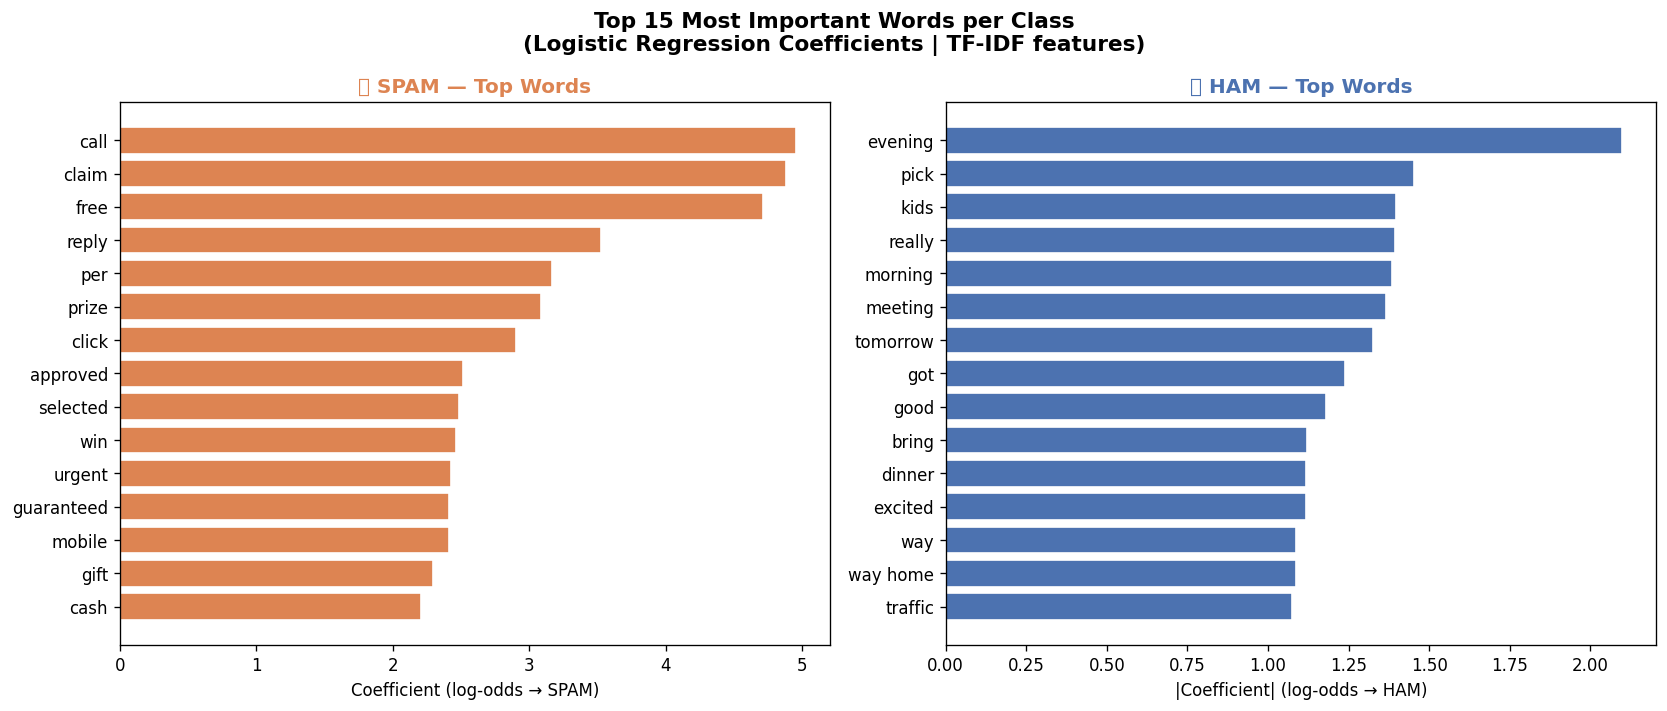

In [20]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tf, y_train)

feature_names = np.array(tfidf_vec.get_feature_names_out())
coefs = lr_model.coef_[0]

TOP_N = 15
top_spam_idx  = np.argsort(coefs)[::-1][:TOP_N]
top_ham_idx   = np.argsort(coefs)[:TOP_N]
top_spam_words  = feature_names[top_spam_idx]
top_spam_scores = coefs[top_spam_idx]
top_ham_words   = feature_names[top_ham_idx]
top_ham_scores  = np.abs(coefs[top_ham_idx])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Top 15 Most Important Words per Class\n(Logistic Regression Coefficients | TF-IDF features)',
             fontsize=13, fontweight='bold')

axes[0].barh(top_spam_words[::-1], top_spam_scores[::-1], color='#DD8452', edgecolor='white')
axes[0].set_title(' SPAM  Top Words', fontweight='bold', color='#DD8452')
axes[0].set_xlabel('Coefficient (log-odds  SPAM)')

axes[1].barh(top_ham_words[::-1], top_ham_scores[::-1], color='#4C72B0', edgecolor='white')
axes[1].set_title(' HAM  Top Words', fontweight='bold', color='#4C72B0')
axes[1].set_xlabel('|Coefficient| (log-odds  HAM)')

plt.tight_layout()
plt.show()

In [21]:
print(' Top 15 SPAM Words (Logistic Regression | TF-IDF):')
for w, s in zip(top_spam_words, top_spam_scores):
    print(f'   {w:<30} coef = {s:+.4f}')

print('\n Top 15 HAM Words (Logistic Regression | TF-IDF):')
for w, s in zip(top_ham_words, top_ham_scores):
    print(f'   {w:<30} |coef| = {s:.4f}')

🔝 Top 15 SPAM Words (Logistic Regression | TF-IDF):
   call                           coef = +4.9577
   claim                          coef = +4.8858
   free                           coef = +4.7147
   reply                          coef = +3.5259
   per                            coef = +3.1700
   prize                          coef = +3.0877
   click                          coef = +2.9061
   approved                       coef = +2.5168
   selected                       coef = +2.4853
   win                            coef = +2.4608
   urgent                         coef = +2.4262
   guaranteed                     coef = +2.4156
   mobile                         coef = +2.4092
   gift                           coef = +2.2985
   cash                           coef = +2.2083

🔝 Top 15 HAM Words (Logistic Regression | TF-IDF):
   evening                        |coef| = 2.0991
   pick                           |coef| = 1.4525
   kids                           |coef| = 1.3974
   really  

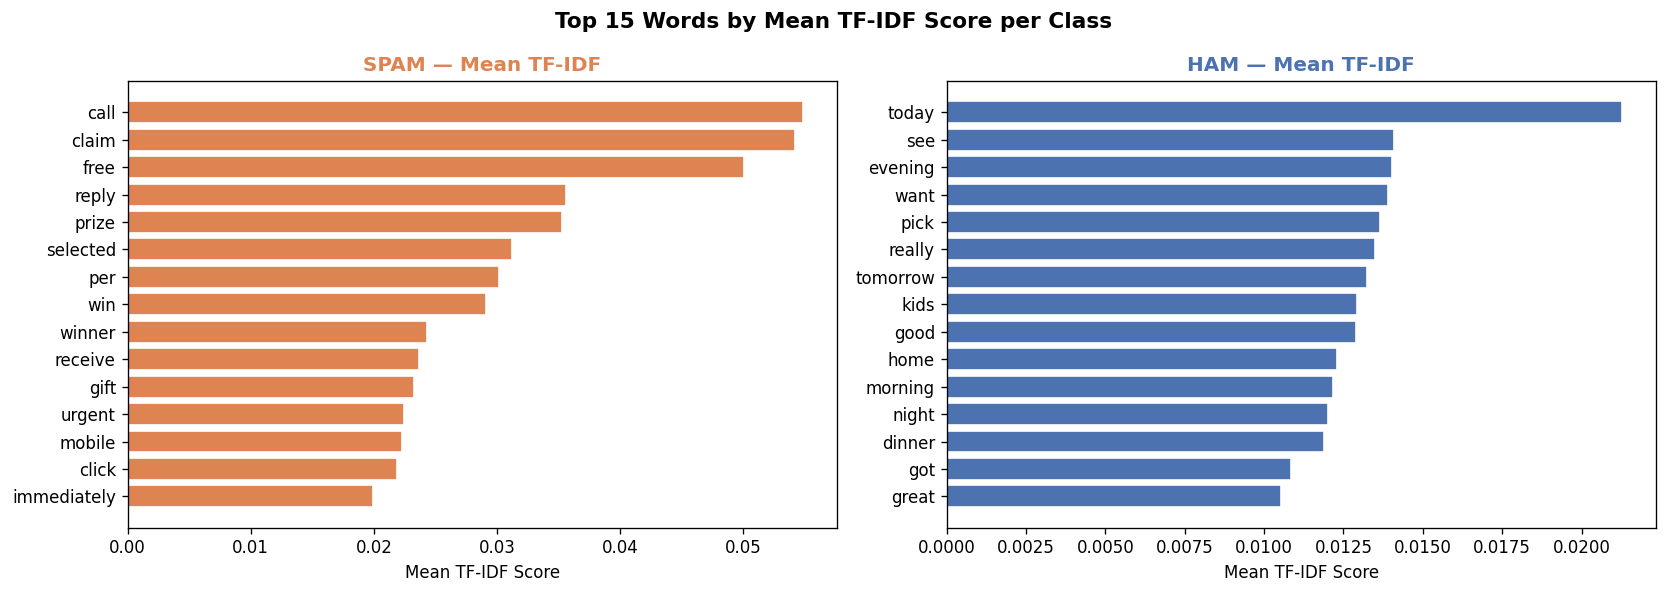

In [22]:
X_all_tf = tfidf_vec.transform(df['clean_message'])
X_all_df = pd.DataFrame(X_all_tf.toarray(), columns=feature_names)
X_all_df['label'] = df['label'].values
mean_tfidf = X_all_df.groupby('label').mean(numeric_only=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Top 15 Words by Mean TF-IDF Score per Class', fontsize=13, fontweight='bold')

for ax, label, color in zip(axes, ['spam', 'ham'], ['#DD8452', '#4C72B0']):
    top = mean_tfidf.loc[label].sort_values(ascending=False).head(15)
    ax.barh(top.index[::-1], top.values[::-1], color=color, edgecolor='white')
    ax.set_title(f'{label.upper()}  Mean TF-IDF', fontweight='bold', color=color)
    ax.set_xlabel('Mean TF-IDF Score')

plt.tight_layout()
plt.show()